project practice 01

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


This dataset contains the details of World Happiness Report in which it contains both numerical and categorical data are present.Here 'Happiness score' is the target variable which contains continous value so it will be terms of Regression problem where we need to predict the happiness score.

EDA

In [4]:
df.shape

(158, 12)

This dataset contains 158 rows and 12 columns ,out of which 1 target variable and remaining 11 are independent variables.

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

As we can see above dataset there is no nan value/missing values present in dataset

<Axes: >

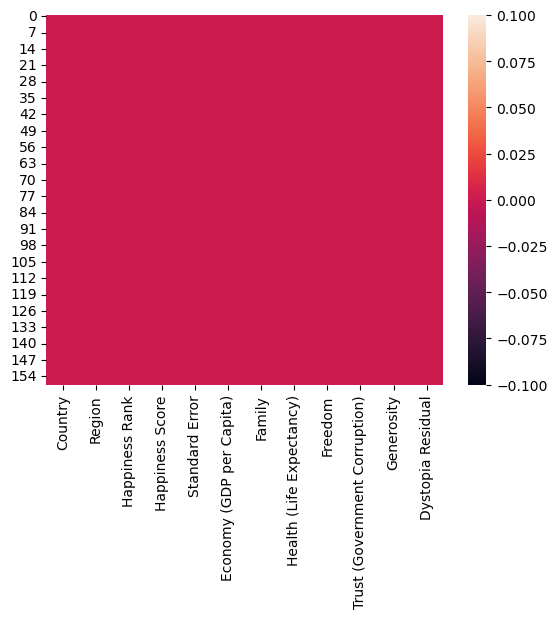

In [8]:
sns.heatmap(df.isnull())

AS visuallially we can see there is no Missing/Nan values in any of the columns.

seperating Numerical and Categorical columns.

In [9]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('cat_col:',cat_col)
print('\n')
                    

cat_col: ['Country', 'Region']




In [10]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('num_col:',num_col)
print('\n')

num_col: ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']




In [11]:
df.nunique().to_frame('number of unique values')

,number of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


In [12]:
df['Happiness Score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This gives the stastical information of the numerical columns.the summary of the above dataset looks perfect.since there is no negative /invalid values present. here Mean is same as Median means no skwness. and as we can see 75th percentile and Max values are high   so there is  outliers are present in the dataset.

Data Visulization

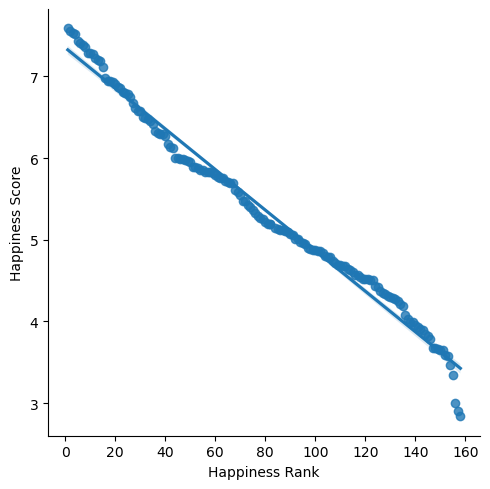

In [14]:
sns.lmplot(x='Happiness Rank',y='Happiness Score',data=df,palette='colorblind')

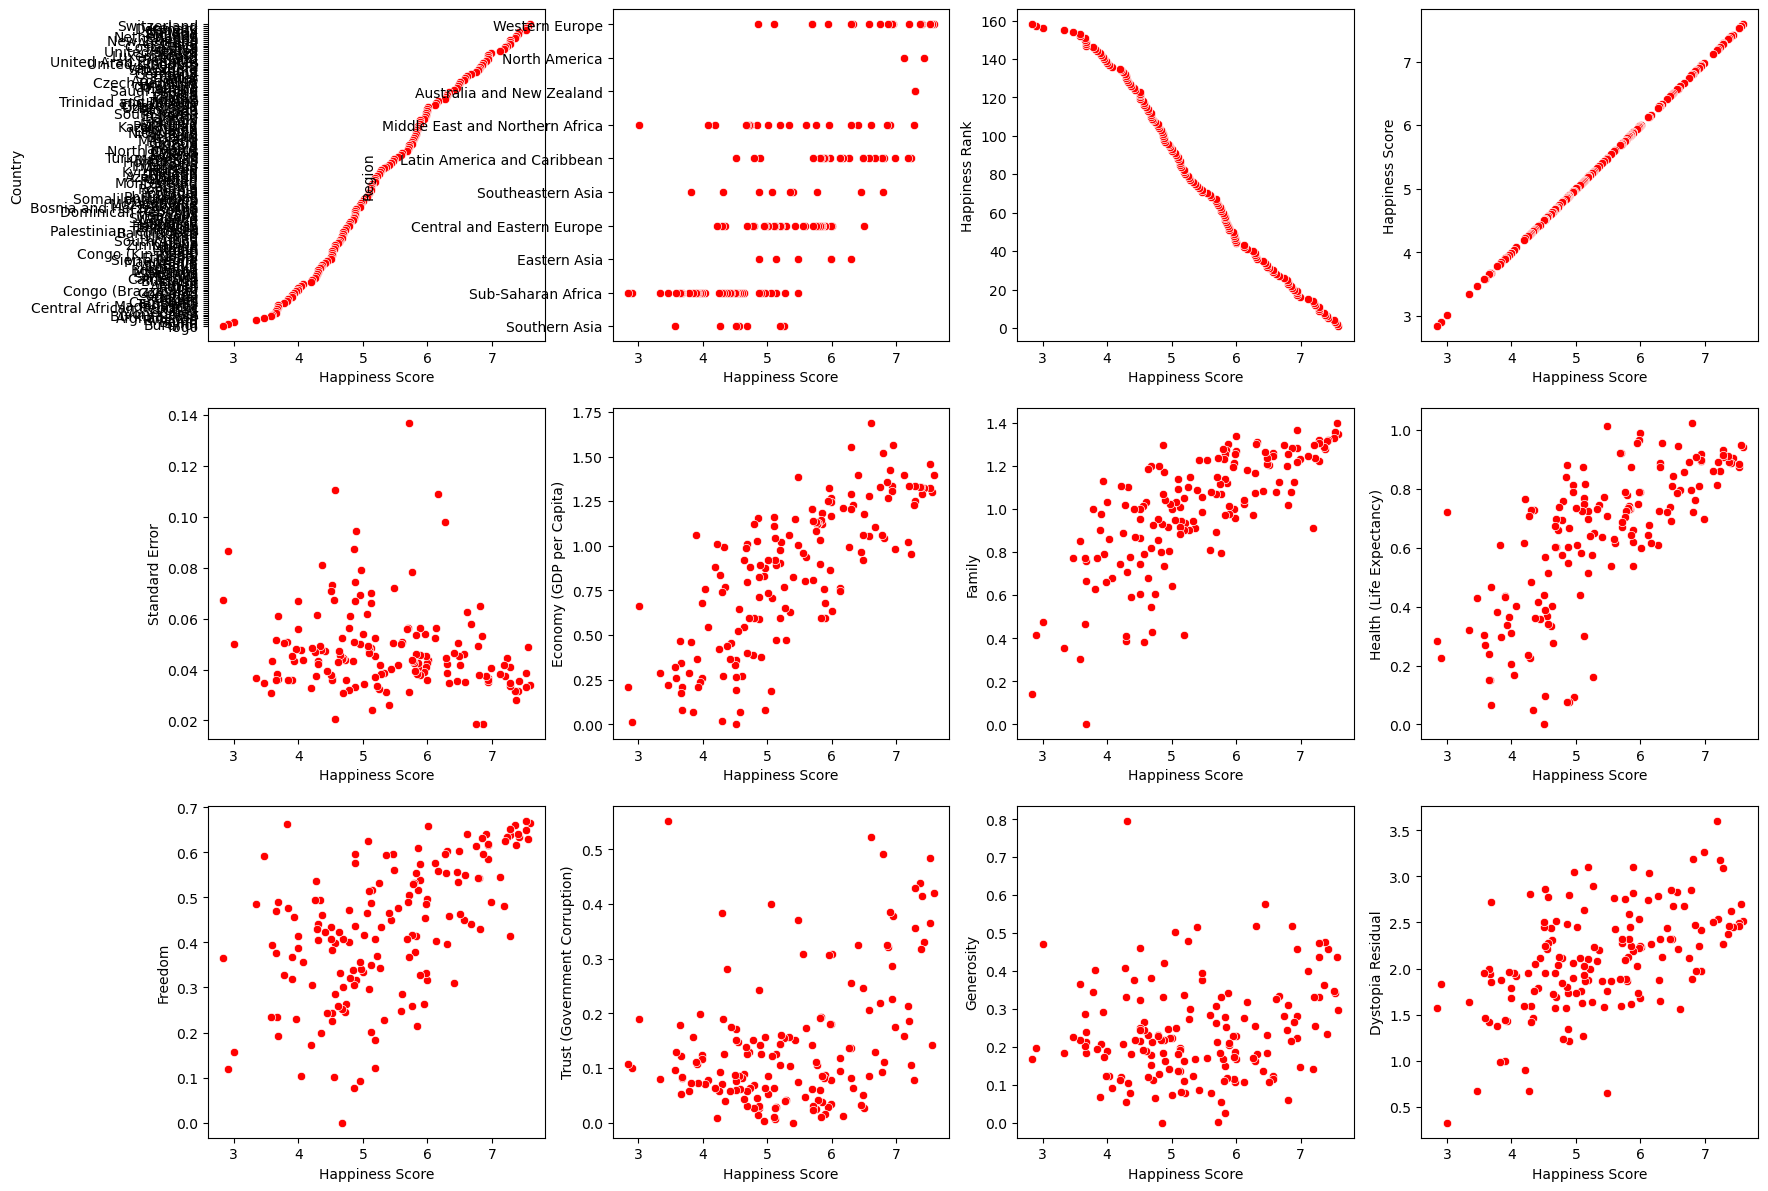

In [15]:
plt.figure(figsize=(20,25))
l=1
for i in df:
    if l<=17:
        plt.subplot(5,4,l)
        sns.scatterplot(x='Happiness Score',y=i,data=df,color='r')
        plt.xlabel('Happiness Score')
        plt.ylabel(i)
    l+=1
    
plt.show()

Multivariant Analyis

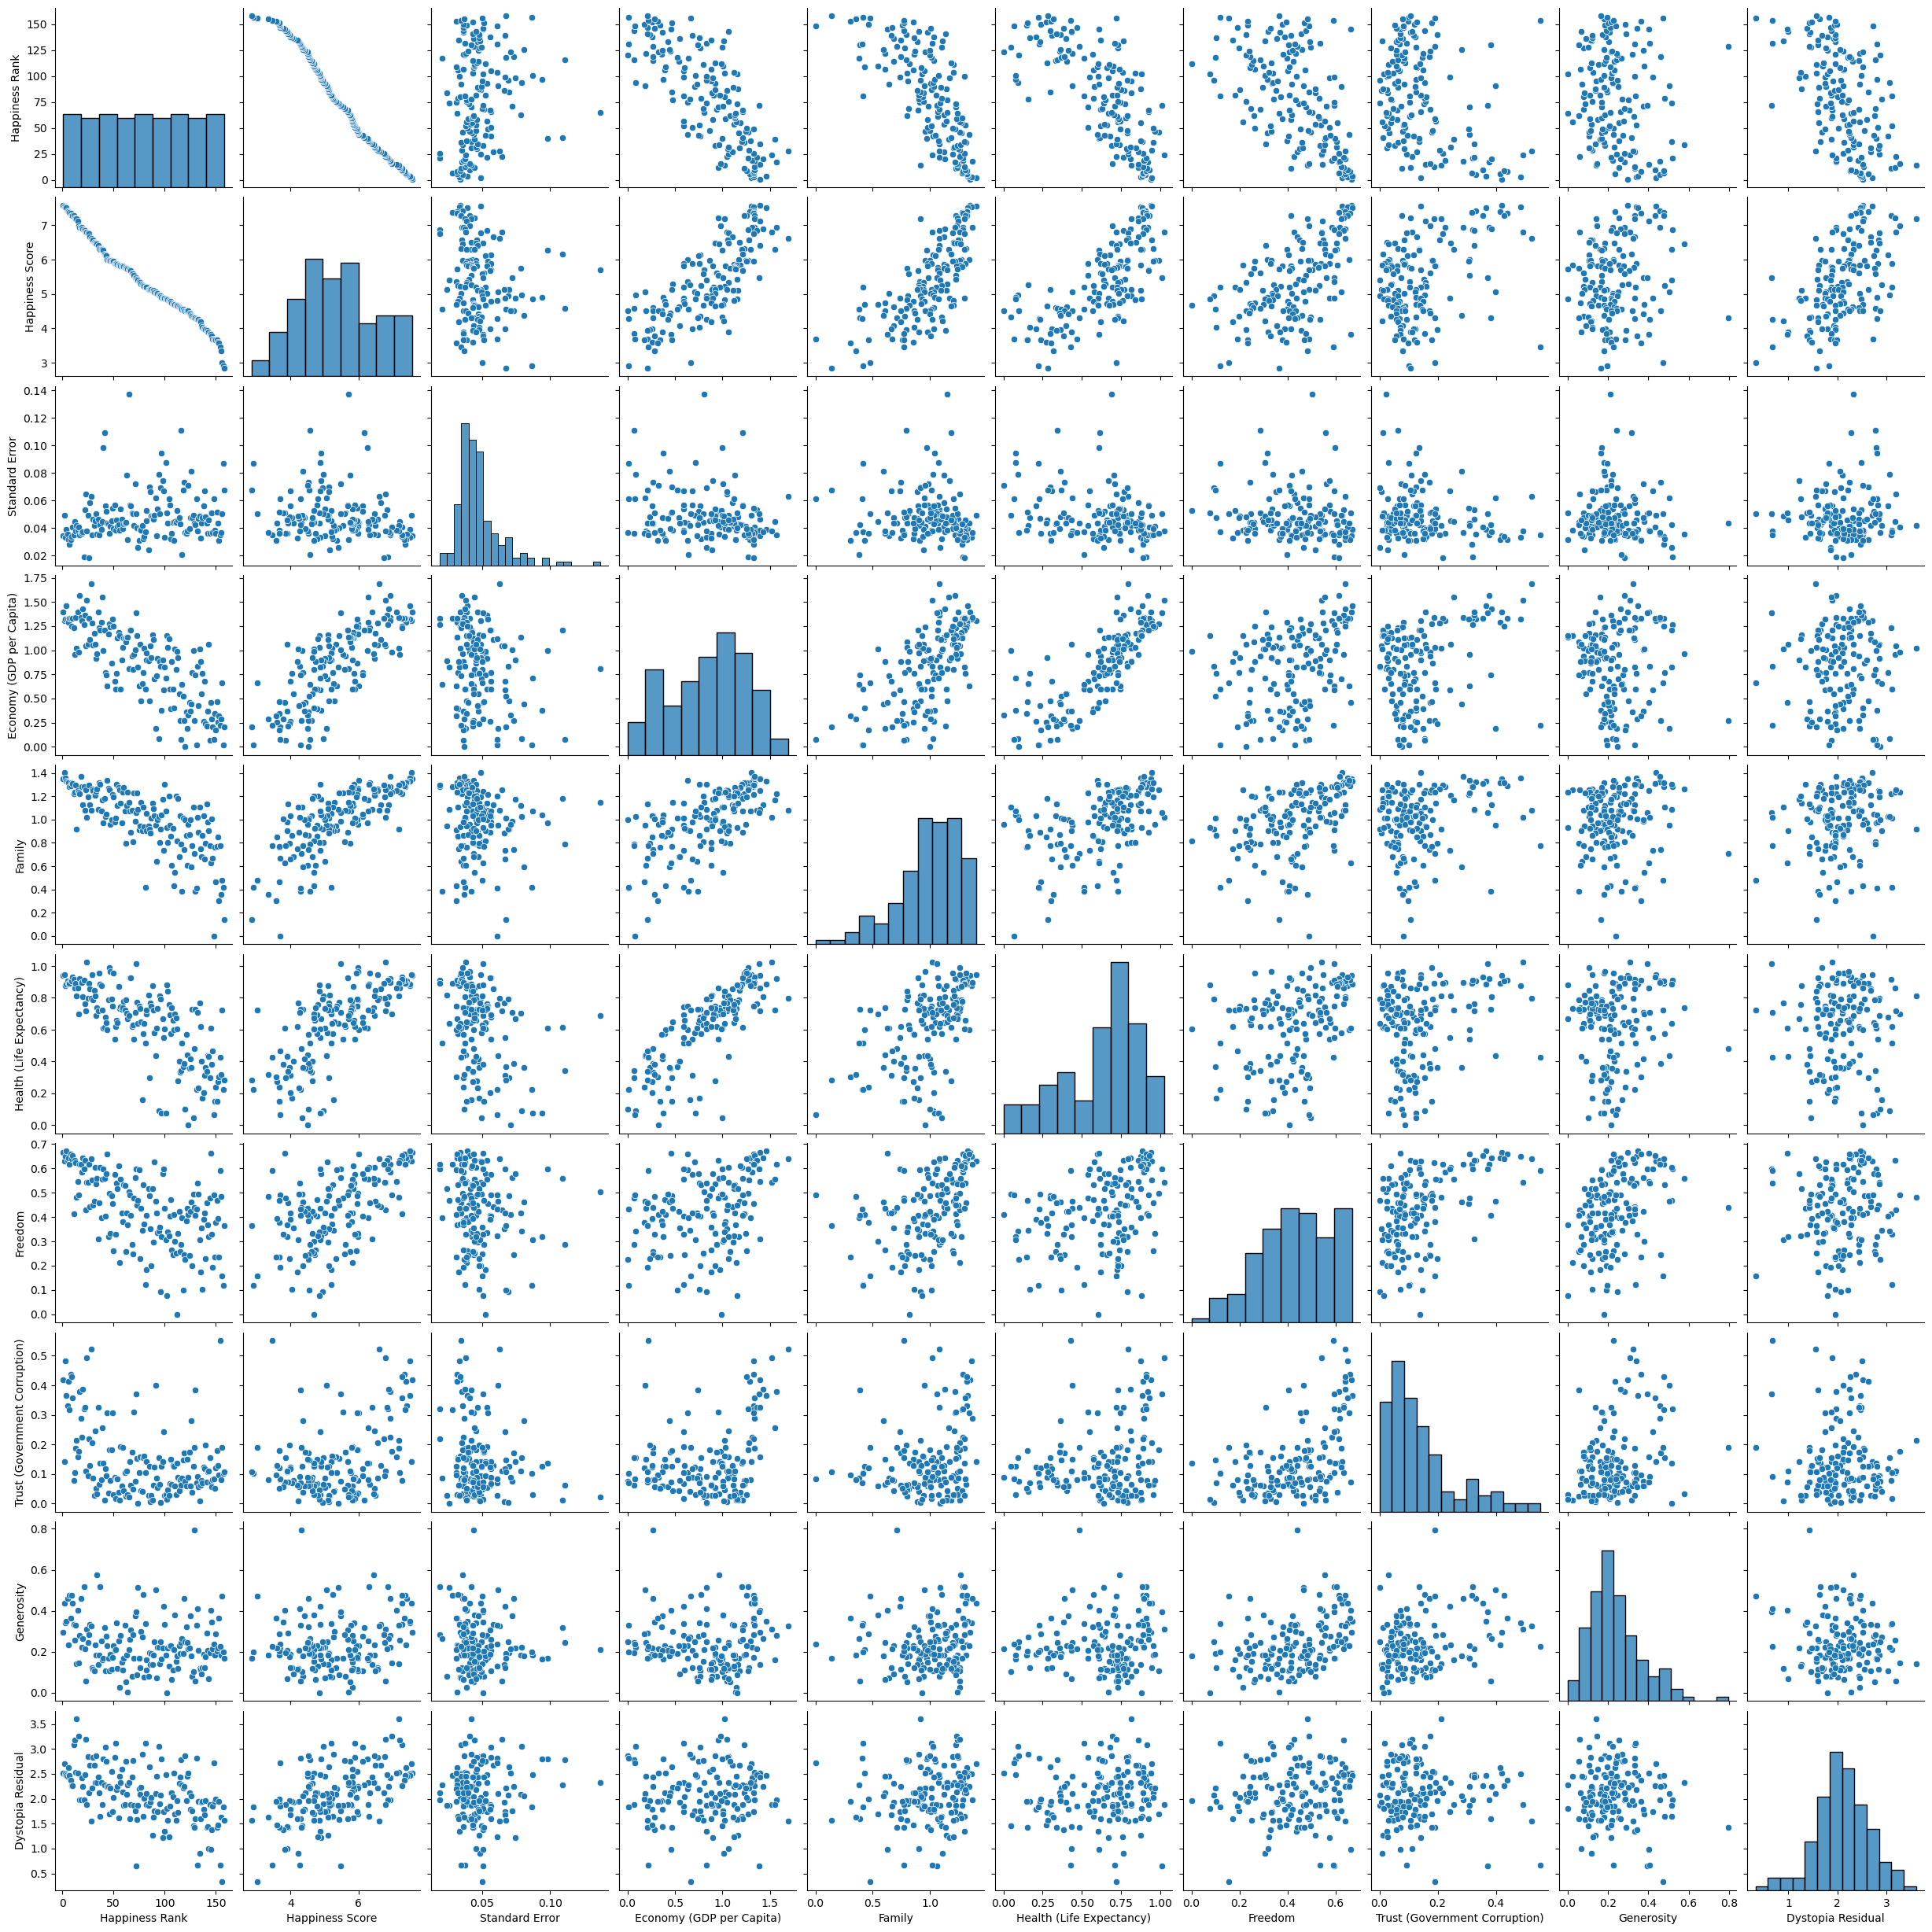

In [16]:
sns.pairplot(data=df,palette='dark2')

In [ ]:
Encoding technique 

here we are using encoding method to change categorical data to numerical data.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        

In [18]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Country                             Axes(0.125,0.53;0.110714x0.35)
Region                           Axes(0.257857,0.53;0.110714x0.35)
Happiness Rank                   Axes(0.390714,0.53;0.110714x0.35)
Happiness Score                  Axes(0.523571,0.53;0.110714x0.35)
Standard Error                   Axes(0.656429,0.53;0.110714x0.35)
Economy (GDP per Capita)         Axes(0.789286,0.53;0.110714x0.35)
Family                              Axes(0.125,0.11;0.110714x0.35)
Health (Life Expectancy)         Axes(0.257857,0.11;0.110714x0.35)
Freedom                          Axes(0.390714,0.11;0.110714x0.35)
Trust (Government Corruption)    Axes(0.523571,0.11;0.110714x0.35)
Generosity                       Axes(0.656429,0.11;0.110714x0.35)
Dystopia Residual                Axes(0.789286,0.11;0.110714x0.35)
dtype: object

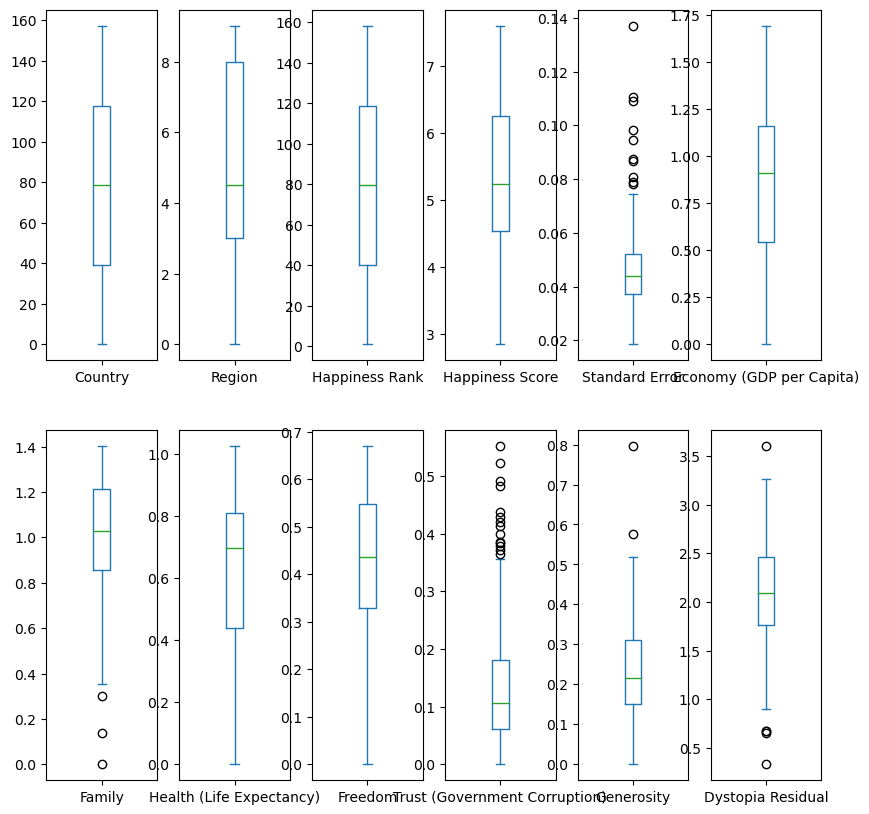

In [20]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

so we have found outliers in the column standard error,Trust,Generosity,DystopiaResudial.to remove outliers Zscore is using before building the model 

In [21]:
from scipy.stats import zscore
out_features=df[['Trust (Government Corruption)','Generosity','Dystopia Residual']]
z=np.abs(zscore(out_features))
z

,Trust (Government Corruption),Generosity,Dystopia Residual
0,2.309652,0.471040,0.758258
1,0.016480,1.575856,1.092857
2,2.842774,0.824293,0.712335
3,1.852081,0.868638,0.663893
4,1.555725,1.748563,0.639337
...,...,...,...
153,3.413922,0.087228,2.588925
154,0.529210,0.433117,0.843967
155,0.381419,1.856891,3.208430
156,0.357715,0.316950,0.481985


In [22]:
threshold=3
np.where(z>3)

(array([ 27, 128, 153, 155], dtype=int64), array([0, 1, 0, 2], dtype=int64))

In [23]:
df1=df[(z<3).all(axis=1)]

In [24]:
df1.shape

(154, 12)

In [25]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 158
new dataframe: 154


In [26]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 2.5316455696202533


In [27]:
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
151,20.0,8.0,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.0,7.0,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Skewness

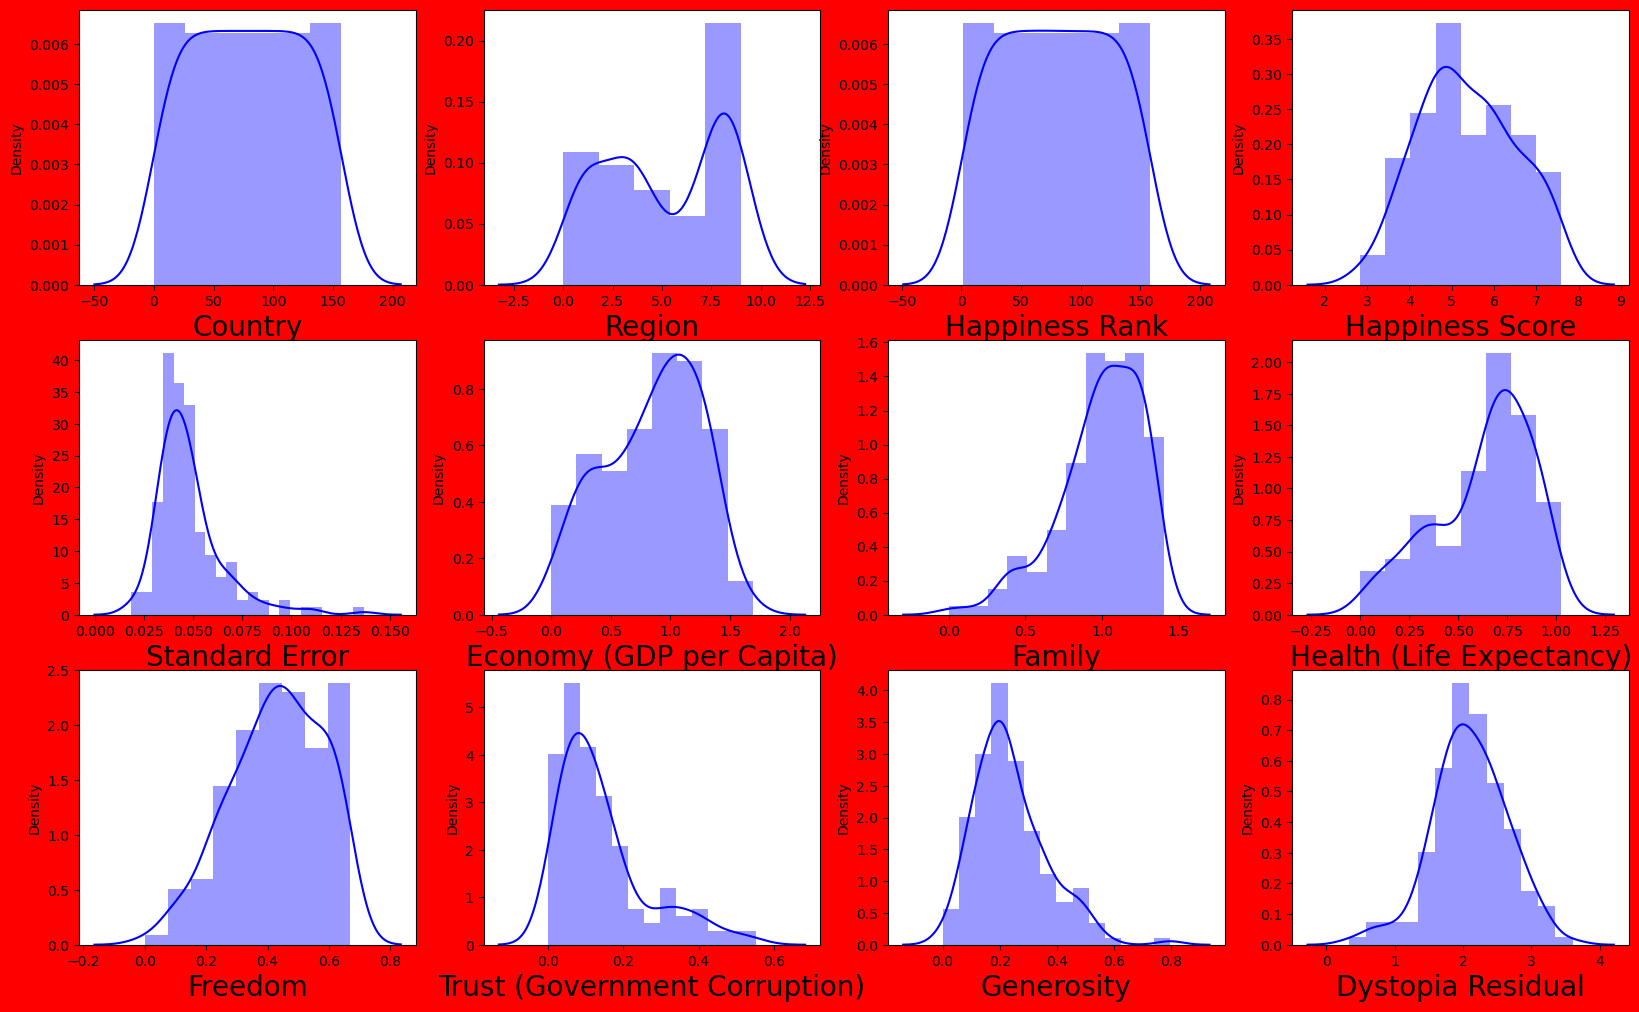

In [28]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

from above distribution plots we can notice that data almost looks normal in most of the columns except, standard error,trust,and Generosity.so we can use cuberoot method to remove skweness here.

In [30]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [31]:
df['Standard Error']=np.cbrt(df['Standard Error'])


In [32]:
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [33]:
df['Generosity']=np.cbrt(df['Generosity'])

In [34]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

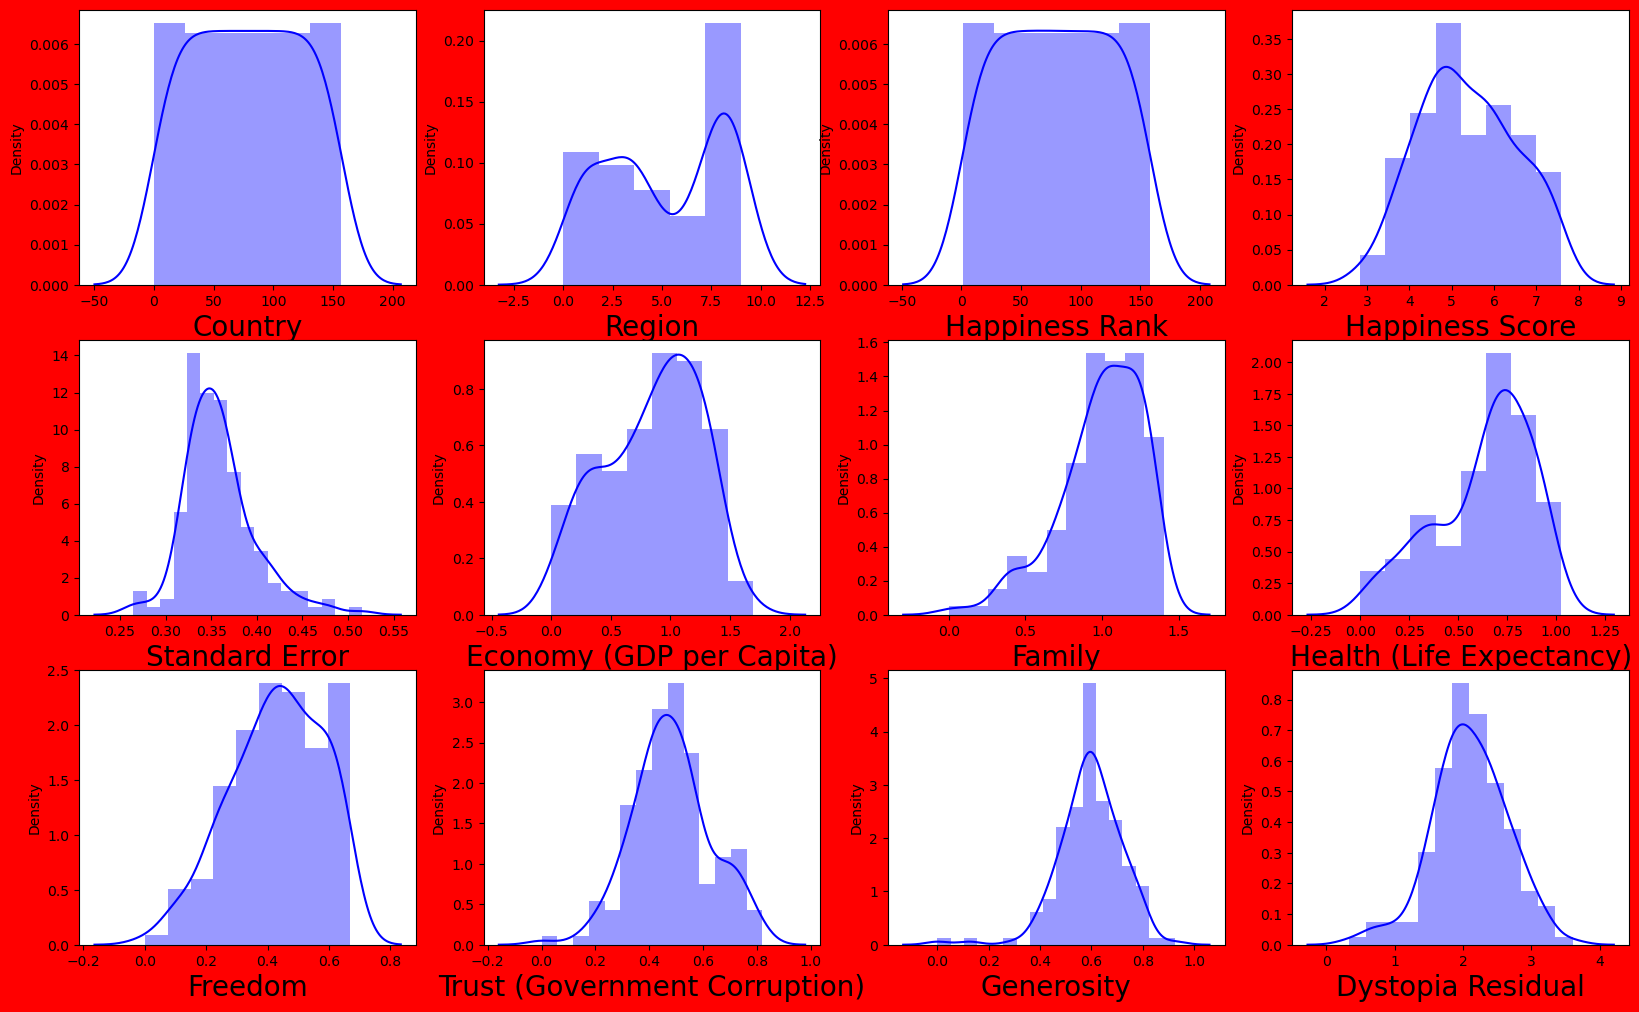

In [35]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

now above dataset all columns looks nomarally distributed and removed the skewness.

In [36]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.025445,0.037808,0.159416,0.037829,0.085684,0.059858,0.115876,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.047720,-0.260139,-0.168533,-0.357508,0.092567,0.213506,0.269423,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.182211,-0.785267,-0.733644,-0.735613,-0.556886,-0.304207,-0.141914,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,0.025445,-0.047720,0.182211,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.054081,0.063299
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust (Government Corruption),0.059858,0.213506,-0.304207,0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769


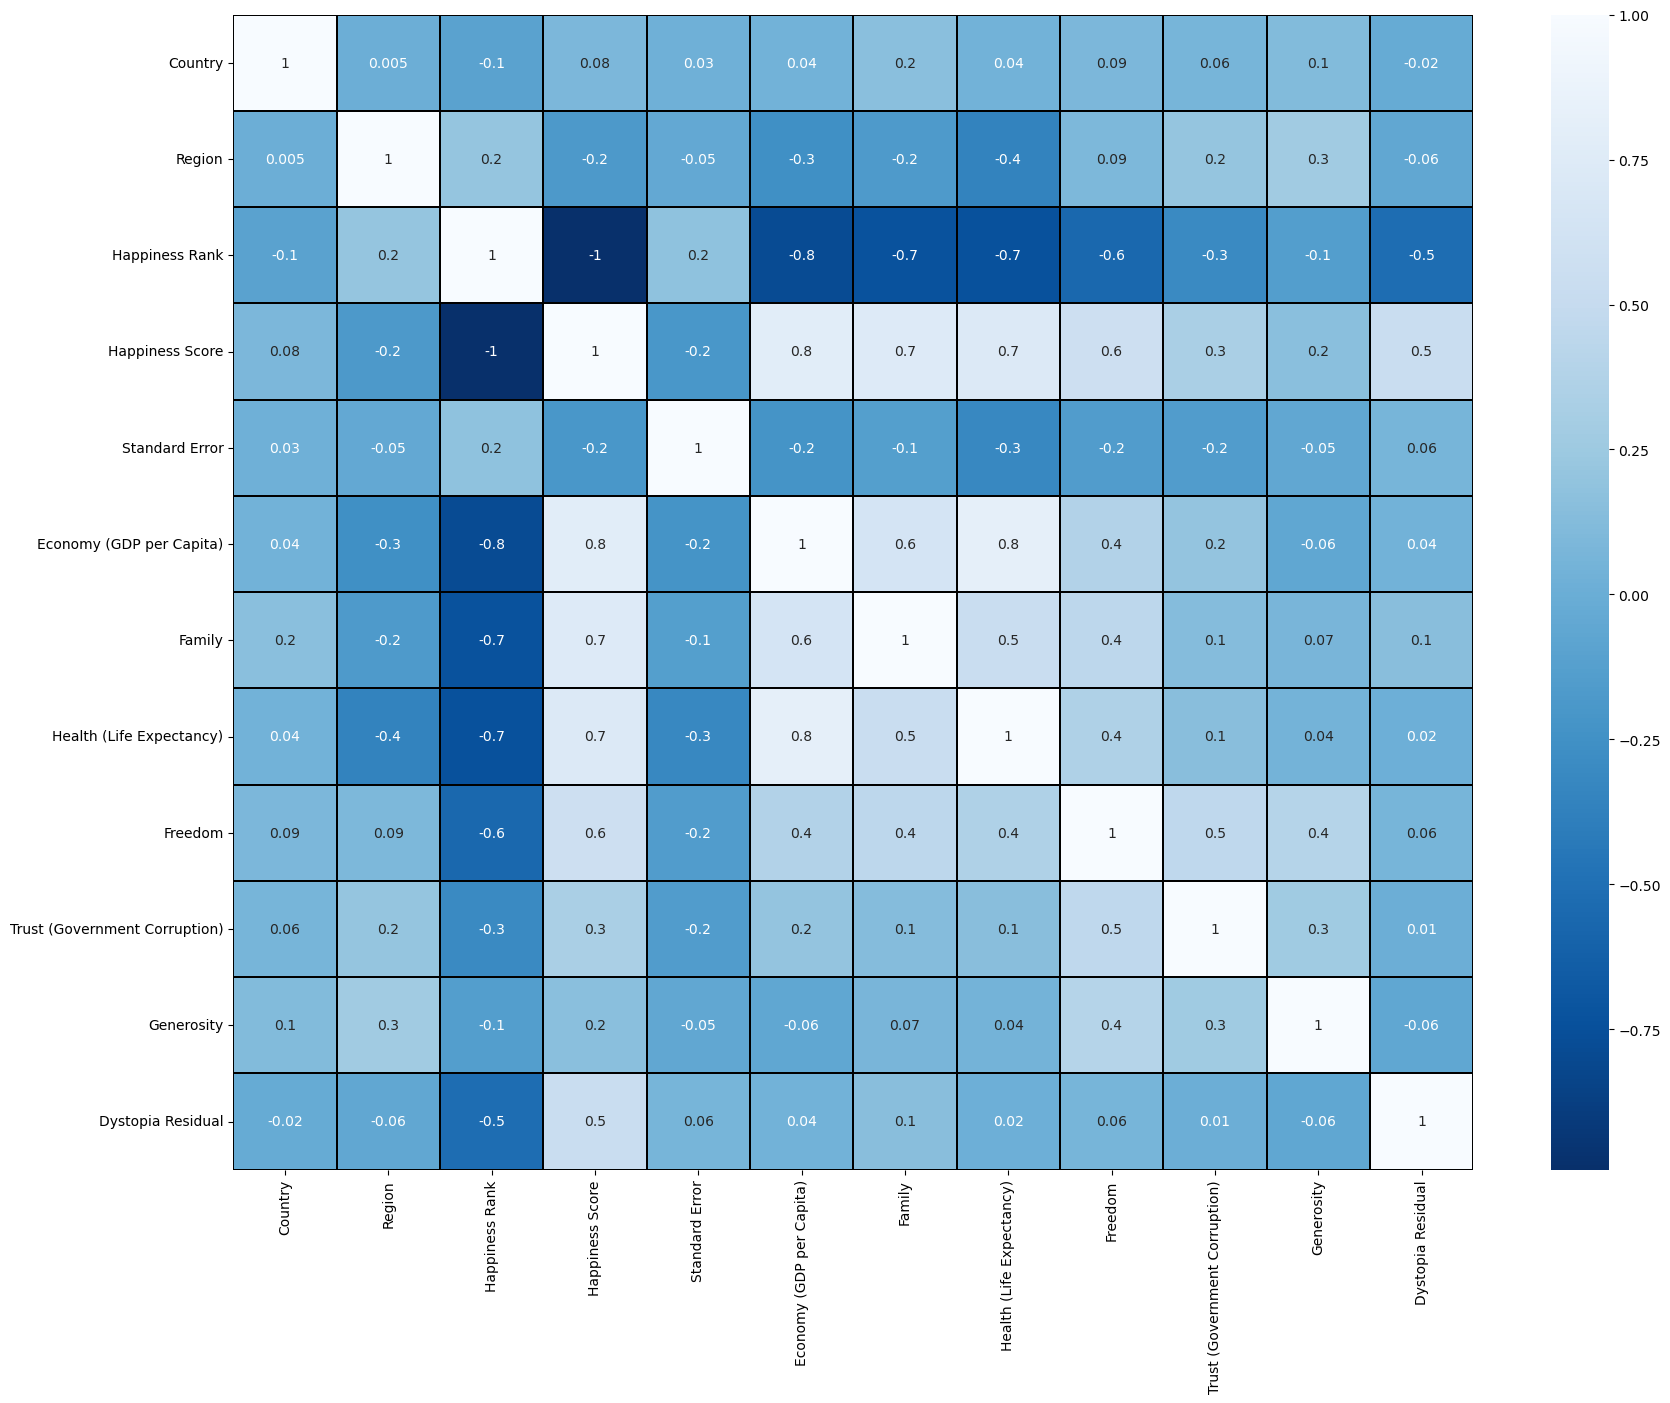

In [89]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [37]:
x=df.drop('Happiness Score',axis=1)

In [38]:
y=df['Happiness Score']

Feature scaling 

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [40]:
x

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,-0.892612,1.369621,1.320281,1.263408,1.577438,1.826993,0.576890,0.758258
1,-0.449465,1.300256,-1.699075,0.172283,1.135226,1.514458,1.289434,1.332456,0.260958,1.325808,1.092857
2,-0.909893,1.300256,-1.677149,-0.961125,1.192861,1.361054,0.992229,1.469659,2.075620,0.837993,0.712335
3,0.581016,1.300256,-1.655224,-0.524996,1.525130,1.251922,1.035145,1.605131,1.592625,0.869128,0.663893
4,-1.194920,-0.040302,-1.633299,-0.777930,1.194876,1.221204,1.118054,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-0.849442,-1.552987,-0.800520,-0.818610,1.087740,2.318782,0.104570,-2.588925
154,-1.436096,0.965117,1.655501,-0.696643,-1.392303,-2.346860,-1.263362,0.372033,-0.357762,-0.239847,-0.843967
155,1.260695,-0.375441,1.677427,0.255966,-0.455245,-1.901086,0.372199,-1.809238,0.624780,1.489900,-3.208430
156,-1.260695,0.965117,1.699352,2.157804,-2.067566,-2.118467,-1.649648,-2.064472,-0.123602,-0.118581,-0.481985


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.082923,Country
1,1.423265,Region
2,68.075177,Happiness Rank
3,1.194998,Standard Error
4,12.782677,Economy (GDP per Capita)
5,5.282522,Family
6,8.004387,Health (Life Expectancy)
7,3.130638,Freedom
8,1.780490,Trust (Government Corruption)
9,2.010527,Generosity


As you can see above dataset Happinee rank of vif value is too high means highly correaleted so we can drop the Happiness rank columns.

In [42]:
x.drop('Happiness Rank',axis=1,inplace=True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.049396,Country
1,1.389640,Region
2,1.179760,Standard Error
3,4.101040,Economy (GDP per Capita)
4,2.015270,Family
5,3.771598,Health (Life Expectancy)
6,1.826359,Freedom
7,1.383847,Trust (Government Corruption)
8,1.398530,Generosity
9,1.046352,Dystopia Residual


so we have solved the multicolinearity issue.we can now ahead for model building

Model Bulding

As you can see this is Regression problem in this we have continous data so we use regression model here.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [47]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Maximum r2 score is',maxAccu,'On random states',maxRs)

Maximum r2 score is 0.9984793358565445 On random states 145


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)
pred_Lr=Lr.predict(x_test)
pred_train=Lr.predict(x_train)
print(Lr)
print('R2_score:',r2_score(y_test,pred_Lr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Lr))
print('Mean squared error:',mean_squared_error(y_test,pred_Lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Lr)))

LinearRegression()
R2_score: 0.995002366154998
R2_score on train data: 99.73271056592284
Mean absolute error: 0.04843989142841343
Mean squared error: 0.005001684268888209
Root mean squared error: 0.07072258669539887


In [52]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)
pred_Rfr=Rfr.predict(x_test)
pred_train=Rfr.predict(x_train)
print(Rfr)
print('R2_score:',r2_score(y_test,pred_Rfr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_Rfr))
print('Mean squared error:',mean_squared_error(y_test,pred_Rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_Rfr)))

RandomForestRegressor()
R2_score: 0.8095830350564935
R2_score on train data: 98.43190917816626
Mean absolute error: 0.351009375
Mean squared error: 0.19057129186041677
Root mean squared error: 0.436544719198866


In [55]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean squared error:',mean_squared_error(y_test,pred_knn))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_score: 0.8452424161183925
R2_score on train data: 91.7152319284296
Mean absolute error: 0.30480833333333335
Mean squared error: 0.15488300999999996
Root mean squared error: 0.3935517882058217


In [56]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_score:',r2_score(y_test,pred_gbr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error:',mean_squared_error(y_test,pred_gbr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
R2_score: 0.8620379267050746
R2_score on train data: 99.92768787009851
Mean absolute error: 0.2913458044562922
Mean squared error: 0.13807388718413674
Root mean squared error: 0.3715829479189495


In [58]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('R2_score:',r2_score(y_test,pred_ls))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_ls))
print('Mean squared error:',mean_squared_error(y_test,pred_ls))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso(alpha=0.001)
R2_score: 0.9949861769499586
R2_score on train data: 99.73232554834098
Mean absolute error: 0.04871027048542887
Mean squared error: 0.005017886594765301
Root mean squared error: 0.07083704253259944


In [60]:
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print(rg)
print('R2_score:',r2_score(y_test,pred_rg))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_rg))
print('Mean squared error:',mean_squared_error(y_test,pred_rg))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

Ridge(alpha=0.0001)
R2_score: 0.9950023723541944
R2_score on train data: 99.73271056589259
Mean absolute error: 0.04843999107640166
Mean squared error: 0.005001678064667516
Root mean squared error: 0.07072254283230713


In [61]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,pred_dtr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

DecisionTreeRegressor()
R2_score: 0.5097813275352641
R2_score on train data: 100.0
Mean absolute error: 0.5536041666666667
Mean squared error: 0.4906159791666666
Root mean squared error: 0.7004398469295323


In [63]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on train data:',r2_score(y_train,pred_train)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pred_etr))
print('Mean squared error:',mean_squared_error(y_test,pred_etr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

ExtraTreesRegressor()
R2_score: 0.8821682868638638
R2_score on train data: 100.0
Mean absolute error: 0.26317354166666623
Mean squared error: 0.11792721200624968
Root mean squared error: 0.3434053173820255


In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Lr)-score.mean())*100)

[0.92068065 0.89533812 0.87374459 0.65228667 0.9726167 ]
0.862933346115398
difference b/w R2_score and cross_val_score is: 13.206902003960009


In [68]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(Rfr,x,y)
print(score1)
print(score1.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_Rfr)-score1.mean())*100)

[-8.32837064 -2.02610849 -1.0720969  -1.6959768  -5.48259676]
-3.7210299183695925
difference b/w R2_score and cross_val_score is: 453.0612953426086


In [70]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_knn)-score2.mean())*100)

[-9.49594207 -2.35671517 -2.26073927 -8.18019206 -4.68219991]
-5.395157695232706
difference b/w R2_score and cross_val_score is: 624.0400111351098


In [71]:
score3=cross_val_score(gbr,x,y)
print(score3)
print(score3.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_gbr)-score3.mean())*100)

[-3.8714493  -1.02542293 -2.64508023 -1.61443623 -3.88017219]
-2.607312175621059
difference b/w R2_score and cross_val_score is: 346.93501023261337


In [72]:
score4=cross_val_score(ls,x,y)
print(score4)
print(score4.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_ls)-score4.mean())*100)

[0.90408883 0.8968288  0.87375808 0.67087787 0.97233284]
0.863577283319213
difference b/w R2_score and cross_val_score is: 13.14088936307456


In [73]:
score5=cross_val_score(rg,x,y)
print(score5)
print(score5.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_rg)-score5.mean())*100)

[0.92067794 0.89533828 0.87374442 0.65228752 0.9726169 ]
0.8629330104886064
difference b/w R2_score and cross_val_score is: 13.206936186558805


In [74]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[-8.72581789 -7.51218853 -8.24269938 -9.98962923 -6.05951602]
-8.105970211408069
difference b/w R2_score and cross_val_score is: 861.5751538943332


In [75]:
score7=cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print('difference b/w R2_score and cross_val_score is:',(r2_score(y_test,pred_etr)-score7.mean())*100)

[-7.07540301 -0.26910857 -1.37483158 -2.55006843 -4.93949823]
-3.241781963206646
difference b/w R2_score and cross_val_score is: 412.395025007051


From diffence b/w r2_score and Cross_val_score computed on r2 svore we can conclude Ridge regressor as our best fit and best performing model

Hyper Parametr Tunning

In [79]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[1.0,0.05,0.4,2],'fit_intercept':[True,False],'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],'positive':[False,True],'random_state':range(1,20)}
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [82]:
model=Ridge(alpha=1.0,fit_intercept=True,positive=True,random_state=1,solver='auto')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('r2_score:',r2_score(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


r2_score: 0.9949723018125778
Mean absolute error: 0.05047715146028791
Mean squared error: 0.005031772977505429
Root mean squared error: 0.0709349912067763


save the Model

In [83]:
import joblib
import pickle
filename='Happiness.pkl'
pickle.dump(model,open(filename,'wb'))

In [86]:
import pickle
load_model=pickle.load(open('Happiness.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

99.49723018125778


Conclusion

In [87]:
conclusion=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])

In [88]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,5.15679,2.886246,5.141666,4.939235,3.70997,6.496309,7.176823,4.8558,5.823901,5.89341,...,4.874629,3.692541,6.055225,4.698232,6.345317,3.658537,5.047444,6.00369,5.089268,6.717422
Original,5.12900,2.839000,5.140000,4.971000,3.68100,6.505000,7.187000,4.8670,5.889000,5.87800,...,4.874000,3.655000,5.987000,4.642000,6.295000,3.656000,5.007000,5.94800,5.124000,6.798000
